In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url_1="https://raw.githubusercontent.com/edavgaun/RCEL_506/refs/heads/main/Module%203/Housing%20states/housing_fl_1.csv"
url_2="https://raw.githubusercontent.com/edavgaun/RCEL_506/refs/heads/main/Module%203/Housing%20states/housing_fl_2.csv"

In [3]:
df1 = pd.read_csv(url_1)
df2 = pd.read_csv(url_2)
df = pd.concat([df1, df2])
df.columns

Index(['Unnamed: 0', 'url', 'region', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [4]:
columns=['region', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'description', 'lat',
       'long', 'state']

df=df[columns]

In [5]:
df = df[(df.price > 500)&(df.price < 2500)&(df.sqfeet>600)&(df.sqfeet<2500)]

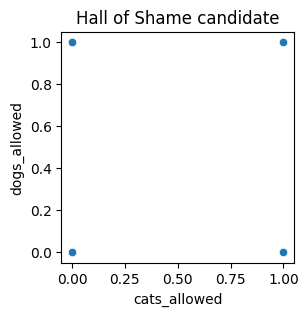

In [6]:
fig, axs = plt.subplots(figsize=(3,3))
plt.title("Hall of Shame candidate")
sns.scatterplot(data=df, x='cats_allowed', y='dogs_allowed')
plt.show()

In [7]:
df["type2"]=df.type.apply(lambda x: "others" if x not in ["apartment", "house", "townhouse", "condo"] else x)

In [8]:
df.columns

Index(['region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'description', 'lat', 'long', 'state', 'type2'],
      dtype='object')

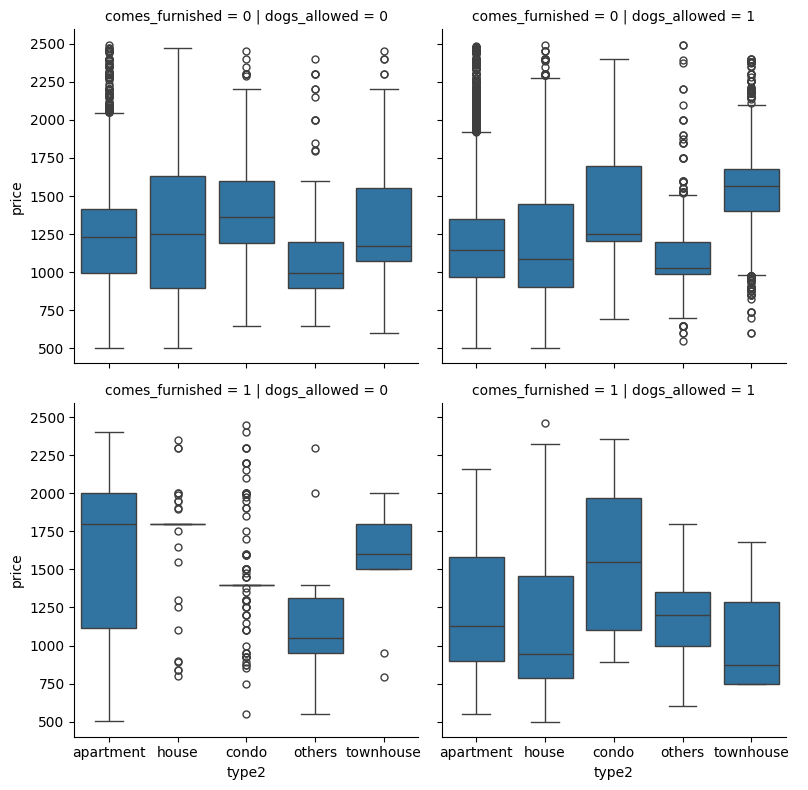

In [9]:
sns.catplot(data=df, x='type2', y='price',
            col="dogs_allowed", row="comes_furnished",
            kind="box", height=4, aspect=1)
plt.show()

In [10]:
# Eliminando datos duplicados
df.drop_duplicates(subset=['lat', 'long'], inplace=True)
df.reset_index(drop=True, inplace=True)

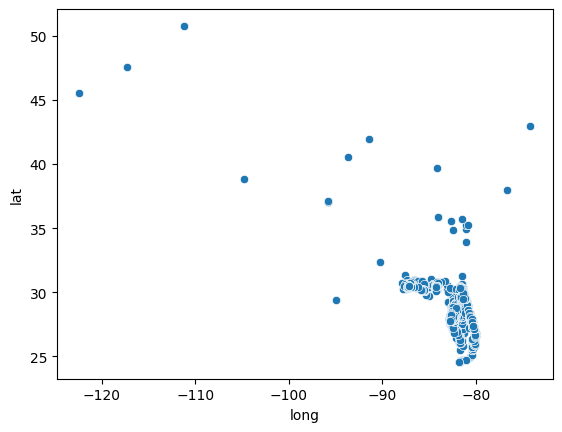

In [11]:
# Gráficando datos geolocalizados
sns.scatterplot(data=df, x='long', y='lat')
plt.show()

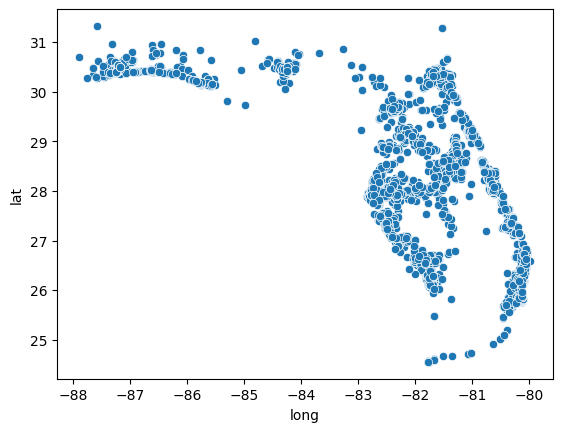

In [12]:
sns.scatterplot(data=df[(df['long'] > -89) & (df['lat'] < 32)],
                x='long', y='lat')
plt.show()

In [13]:
# https://github.com/edavgaun/topojson/blob/master/countries/us-states/FL-12-florida-counties.json
import geopandas as gpd
url_fl = "https://raw.githubusercontent.com/edavgaun/topojson/refs/heads/master/countries/us-states/FL-12-florida-counties.json"
gdf_fl = gpd.read_file(url_fl)

<Axes: >

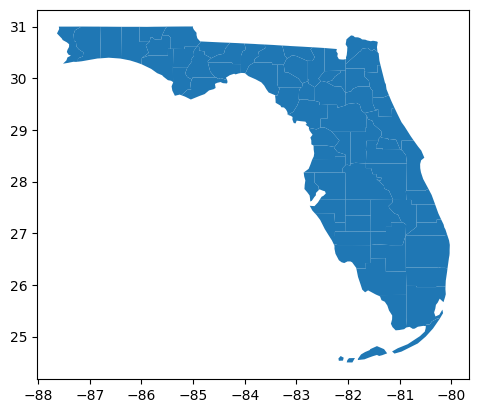

In [14]:
gdf_fl.plot()

In [15]:
df = df[(df['long'] > -89) & (df['lat'] < 32)]

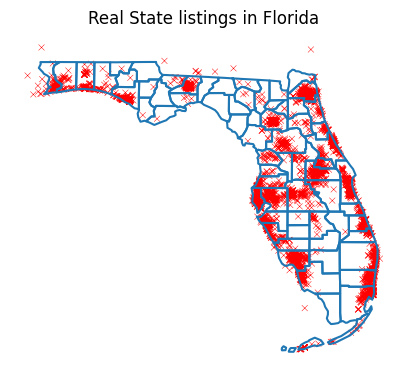

In [16]:
# Agregando un contexto
fig, axs = plt.subplots(figsize=(5,5))
gdf_fl.boundary.plot(ax=axs)
sns.scatterplot(data=df, x='long', y='lat', ax=axs,
                color="Red", marker="x", size=2.5,
                legend=None)
plt.title("Real State listings in Florida")
plt.axis('off')
plt.show()

In [17]:
gdf_fl.shape

(67, 11)

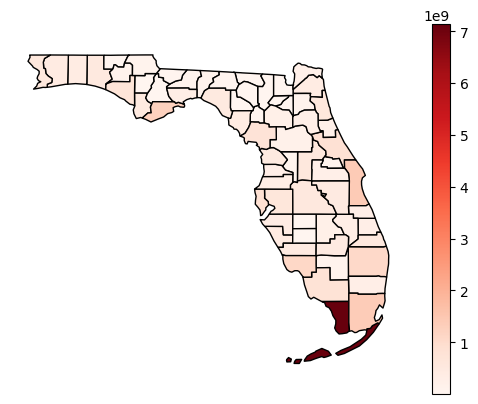

In [18]:
# Mapa coroplético
gdf_fl.plot(column='AWATER', cmap="Reds", legend=True,
            edgecolor="Black")
plt.axis("off")
plt.show()

In [19]:
df.region.unique()

array(['daytona beach', 'ft myers / SW florida', 'gainesville',
       'jacksonville', 'ocala', 'heartland florida', 'lakeland',
       'florida keys', 'north central FL', 'orlando', 'panama city',
       'pensacola', 'sarasota-bradenton', 'south florida',
       'okaloosa / walton', 'space coast', 'tallahassee',
       'tampa bay area', 'treasure coast', 'st augustine'], dtype=object)

In [20]:
gdf_fl["NAME"].unique()

array(['Duval', 'Highlands', 'Gulf', 'Leon', 'Hamilton', 'Palm Beach',
       'Liberty', 'St. Lucie', 'Sarasota', 'Clay', 'Charlotte', 'Walton',
       'Manatee', 'Hendry', 'Lake', 'Flagler', 'Hardee', 'Hillsborough',
       'Bradford', 'Columbia', 'St. Johns', 'Gilchrist', 'Lafayette',
       'Brevard', 'Union', 'Indian River', 'Holmes', 'Jefferson',
       'Okaloosa', 'Broward', 'Okeechobee', 'Calhoun', 'Collier',
       'Volusia', 'Sumter', 'Hernando', 'Gadsden', 'Seminole', 'DeSoto',
       'Alachua', 'Dixie', 'Taylor', 'Madison', 'Lee', 'Citrus', 'Polk',
       'Martin', 'Santa Rosa', 'Osceola', 'Washington', 'Orange',
       'Pinellas', 'Escambia', 'Bay', 'Monroe', 'Glades', 'Suwannee',
       'Baker', 'Marion', 'Putnam', 'Miami-Dade', 'Pasco', 'Nassau',
       'Franklin', 'Jackson', 'Levy', 'Wakulla'], dtype=object)

In [21]:
df_agrupado = df[["region", "lat", "long", "price"]].groupby("region").mean()

In [22]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="My_app")
location = geolocator.geocode("Miami beach")
location.latitude, location.longitude

(25.7929198, -80.1353006)

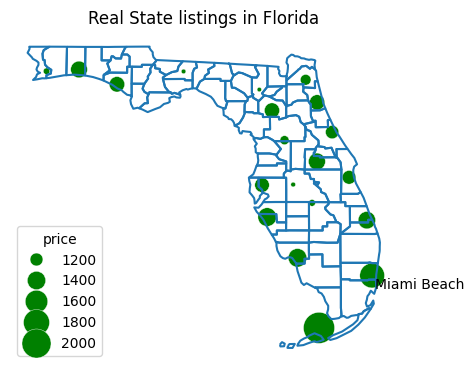

In [23]:
fig, axs = plt.subplots(figsize=(5,5))
gdf_fl.boundary.plot(ax=axs)
sns.scatterplot(data=df_agrupado,
                x='long', y='lat', ax=axs,
                color="Green", size='price',
                sizes=(10,500))

plt.text(-80.1353006, 25.7929198, "Miami Beach")
plt.title("Real State listings in Florida")
plt.axis('off')
plt.show()

<img src="https://clauswilke.com/dataviz/aesthetic_mapping_files/figure-html/common-aesthetics-1.png" width="500">

<img src="https://miro.medium.com/v2/resize:fit:1200/1*11SBac2NeUNmVLrl8fY_vQ.png" width=600>

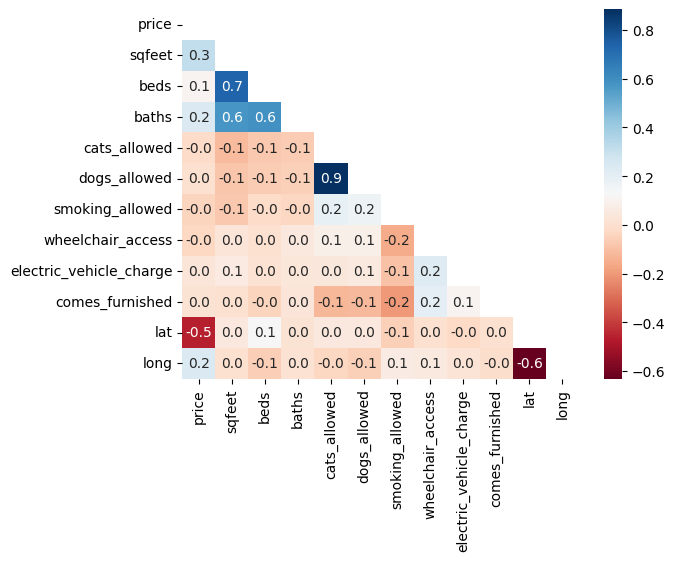

In [24]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu',
            mask=np.triu(corr), fmt=".1f")
plt.show()

<img src="https://thrivemyway.com/wp-content/uploads/2021/10/Color-scheme-Color-psychology-color-scheme.jpg" width=400>

In [25]:
from sklearn.linear_model import LinearRegression

X = df[['sqfeet', 'beds', 'lat', 'long', 'baths',
        'dogs_allowed', 'smoking_allowed']]
y = df['price']

reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.36513161657160387

Text(0, 0.5, 'Magnitud del coeficiente')

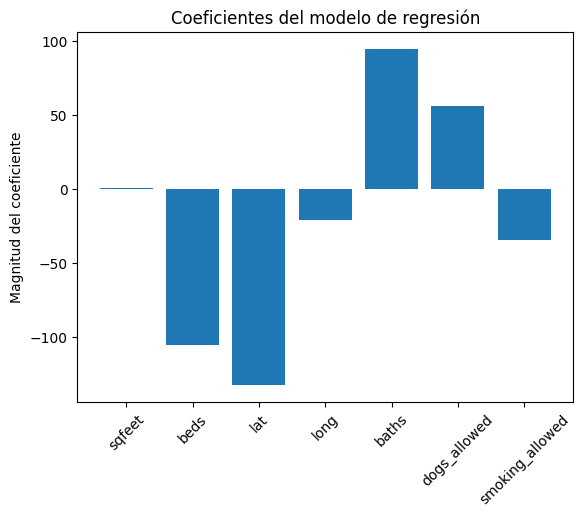

In [26]:
# Explicabilidad del modelo
plt.bar(x=X.columns, height=reg.coef_)
plt.xticks(rotation=45)
plt.title("Coeficientes del modelo de regresión")
plt.ylabel("Magnitud del coeficiente")

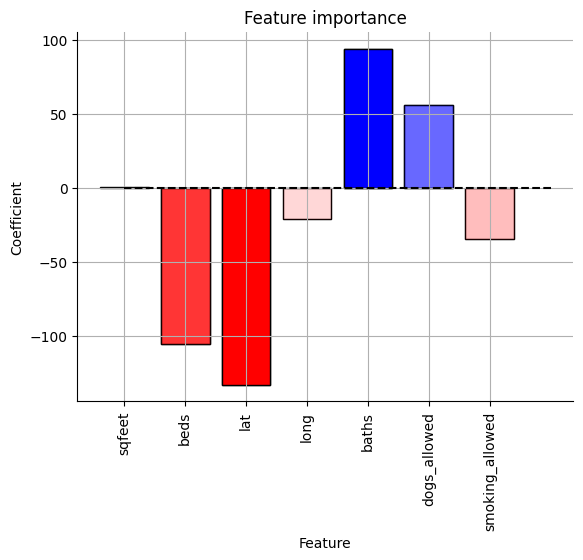

In [27]:
fig, axs = plt.subplots()
for n in range(len(X.columns)):
    color = "Blue"
    a = reg.coef_.max()
    if reg.coef_[n] < 0:
        color = "Red"
        a = reg.coef_.min()
    axs.bar(X.columns[n], reg.coef_[n], color="White",
            edgecolor="Black")
    axs.bar(X.columns[n], reg.coef_[n], color=color,
            alpha=reg.coef_[n]/a, edgecolor="Black")

axs.set_xticks(range(0, len(reg.coef_)),
               reg.feature_names_in_, rotation=90)

axs.set_title("Feature importance")
axs.set_xlabel("Feature")
axs.set_ylabel("Coefficient")
axs.hlines(0, 7, 0, linestyle='--', color="Black")
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.grid()
plt.show()

# Analyzing Unstructured data

In [28]:
df.description[0]

'Welcome to Park at Countryside  Â\xa0 Get $30 OFF per month or $400 OFF your 1st full months rent on select 1 bedrooms!! *WAIVING ADMIN FEES!  Come and see what the fuss is all about at The Park at Countryside, located at 958 Village Trail, Port Orange, FL 32127-7965.  Come home to The Park at Countryside Apartments, nestled beneath towering oaks and palm trees. Relax in our clubhouse for a game of billiards, on the sundeck of our resort-style swimming pool or in the shade of our charming gazebo. Select from spacious one- and two-bedroom apartment homes with color-coordinated interiors, ceiling fans, screened balconies or patios, kitchen pantries, walk-in closets, and 24-hour emergency maintenance. The Park at Countryside Apartments is just minutes from the beach, fine restaurants, shops, and entertainment, and within walking distance to Palmer College of Chiropractic. Visit today and see how easy it can be to enjoy the Park at Countryside Apartments lifestyle.  WATER, SEWER, TRASH an

In [29]:
df.description[1]

'Newer kitchen, flooring.  Seller providing First American Premier warranty.  Negotiable possession. Holly Hill Osteen Debary'

In [30]:
# NLP
corpus =df.description.values.tolist()
corpus=";".join(corpus)
type(corpus), len(corpus)

(str, 4257005)

In [31]:
corpus = corpus.lower()
corpus=[word for word in corpus.split(" ") if len(word) > 3]
len(corpus)

446099

In [32]:
import re
bool(re.search(r'\d+', "$400"))

True

In [33]:
corpus = [word for word in corpus if bool(re.search(r'\d', word))==False]
len(corpus)

427438

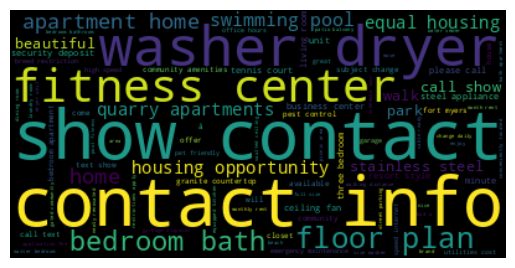

In [34]:
# !pip install wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud().generate(" ".join(corpus))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
# Bag of Words
bow = {}
for word in corpus:
    if word in bow.keys():
        bow[word] += 1
    else:
        bow[word] = 1
bow

{'welcome': 460,
 'park': 1026,
 'countryside': 18,
 'month': 963,
 'your': 3603,
 'full': 755,
 'months': 355,
 'rent': 1815,
 'select': 353,
 'bedrooms!!': 1,
 '*waiving': 1,
 'admin': 121,
 'fees!': 7,
 'come': 498,
 'what': 220,
 'fuss': 4,
 'about': 333,
 'countryside,': 4,
 'located': 1573,
 'village': 206,
 'trail,': 34,
 'port': 223,
 'orange,': 91,
 'home': 2660,
 'apartments,': 491,
 'nestled': 132,
 'beneath': 2,
 'towering': 4,
 'oaks': 102,
 'palm': 411,
 'trees.': 26,
 'relax': 188,
 'clubhouse': 626,
 'game': 111,
 'billiards,': 40,
 'sundeck': 94,
 'resort-style': 299,
 'swimming': 814,
 'pool': 1559,
 'shade': 22,
 'charming': 107,
 'gazebo.': 3,
 'from': 2161,
 'spacious': 1073,
 'one-': 4,
 'two-bedroom': 35,
 'apartment': 2380,
 'homes': 980,
 'with': 7803,
 'color-coordinated': 1,
 'interiors,': 9,
 'ceiling': 708,
 'fans,': 79,
 'screened': 563,
 'balconies': 132,
 'patios,': 71,
 'kitchen': 1553,
 'pantries,': 6,
 'walk-in': 632,
 'closets,': 196,
 'emergency': 3

In [36]:
first_50 = {k: bow[k] for k in list(bow)[:50]}
first_50

{'welcome': 460,
 'park': 1026,
 'countryside': 18,
 'month': 963,
 'your': 3603,
 'full': 755,
 'months': 355,
 'rent': 1815,
 'select': 353,
 'bedrooms!!': 1,
 '*waiving': 1,
 'admin': 121,
 'fees!': 7,
 'come': 498,
 'what': 220,
 'fuss': 4,
 'about': 333,
 'countryside,': 4,
 'located': 1573,
 'village': 206,
 'trail,': 34,
 'port': 223,
 'orange,': 91,
 'home': 2660,
 'apartments,': 491,
 'nestled': 132,
 'beneath': 2,
 'towering': 4,
 'oaks': 102,
 'palm': 411,
 'trees.': 26,
 'relax': 188,
 'clubhouse': 626,
 'game': 111,
 'billiards,': 40,
 'sundeck': 94,
 'resort-style': 299,
 'swimming': 814,
 'pool': 1559,
 'shade': 22,
 'charming': 107,
 'gazebo.': 3,
 'from': 2161,
 'spacious': 1073,
 'one-': 4,
 'two-bedroom': 35,
 'apartment': 2380,
 'homes': 980,
 'with': 7803,
 'color-coordinated': 1}

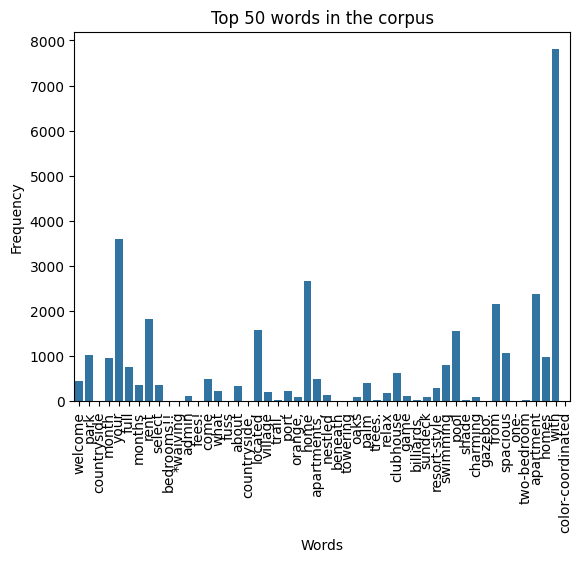

In [37]:
sns.barplot(x=list(first_50.keys()), y=list(first_50.values()))
plt.xticks(rotation=90)
plt.title("Top 50 words in the corpus")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.rcParams['font.size'] = 6
plt.show()

In [38]:
df_bow = pd.DataFrame(data=bow.items(), columns=["Word", "Frq"])
df_bow.head()

,Word,Frq
0,welcome,460
1,park,1026
2,countryside,18
3,month,963
4,your,3603


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, 'with'),
  Text(1, 0, 'your'),
  Text(2, 0, 'home'),
  Text(3, 0, 'apartment'),
  Text(4, 0, 'from'),
  Text(5, 0, 'rent'),
  Text(6, 0, 'located'),
  Text(7, 0, 'pool'),
  Text(8, 0, 'spacious'),
  Text(9, 0, 'park'),
  Text(10, 0, 'homes'),
  Text(11, 0, 'month'),
  Text(12, 0, 'swimming'),
  Text(13, 0, 'full'),
  Text(14, 0, 'clubhouse'),
  Text(15, 0, 'come'),
  Text(16, 0, 'apartments,'),
  Text(17, 0, 'welcome'),
  Text(18, 0, 'palm'),
  Text(19, 0, 'months'),
  Text(20, 0, 'select'),
  Text(21, 0, 'about'),
  Text(22, 0, 'resort-style'),
  Text(23, 0, 'port'),
  Text(24, 0, 'what'),
  Text(25, 0, 'village'),
  Text(26, 0, 'relax'),
  Text(27, 0, 'nestled'),
  Text(28, 0, 'admin')

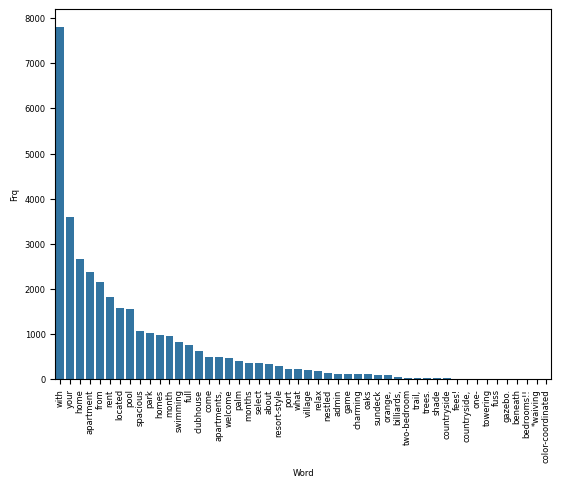

In [39]:
sns.barplot(data=df_bow.head(50).sort_values("Frq", ascending=False),
            x="Word", y="Frq")
plt.xticks(rotation=90)